# EDA for Summer

In [1]:
# preprocessing
import numpy as np
import pandas as pd
import tqdm

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# graph
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load data
summer = pd.read_csv('../data/summer_train.csv')

In [3]:
summer

,stn,year,ta,td,hm,ws,rn,re,ww,ts,si,ss,sn,mm,dd,hh,sunriseh,sunrisem,sunseth,sunsetm
0,1,A,17.6,12.0,69.8,0.7,0.0,0.0,H,17.1,NaN,NaN,NaN,5,1,0,5,37,19,22
1,1,A,15.9,12.3,79.2,0.7,0.0,0.0,H,16.4,NaN,NaN,NaN,5,1,1,5,37,19,22
2,1,A,15.0,12.3,84.0,0.8,0.0,0.0,H,15.9,NaN,NaN,NaN,5,1,2,5,37,19,22
3,1,A,15.1,8.2,65.4,1.7,0.0,0.0,H,15.4,NaN,NaN,NaN,5,1,3,5,37,19,22
4,1,A,16.1,1.6,37.5,2.7,0.0,0.0,C,14.6,NaN,NaN,NaN,5,1,4,5,37,19,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110228,10,E,29.4,25.9,81.6,4.6,0.0,0.0,C,30.6,0.11,0.9,NaN,7,31,19,5,35,19,42
110229,10,E,28.6,26.2,87.3,3.9,0.0,0.0,C,29.1,0.00,0.0,NaN,7,31,20,5,35,19,42
110230,10,E,28.2,26.1,88.6,3.5,0.0,0.0,C,28.3,NaN,NaN,NaN,7,31,21,5,35,19,42
110231,10,E,28.0,26.2,90.1,4.5,0.0,0.0,C,27.9,NaN,NaN,NaN,7,31,22,5,35,19,42


<AxesSubplot:xlabel='stn', ylabel='ts'>

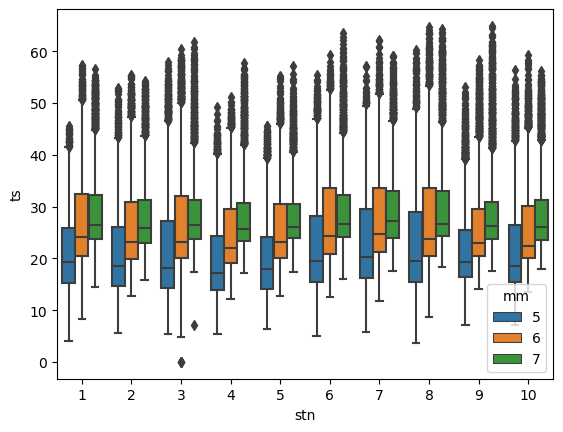

In [4]:
# 월별 지면온도 -> 확실히 증가하는 것을 확인할 수 있다.
sns.boxplot(x = 'stn', y = 'ts', data = summer, hue = 'mm')

<AxesSubplot:>

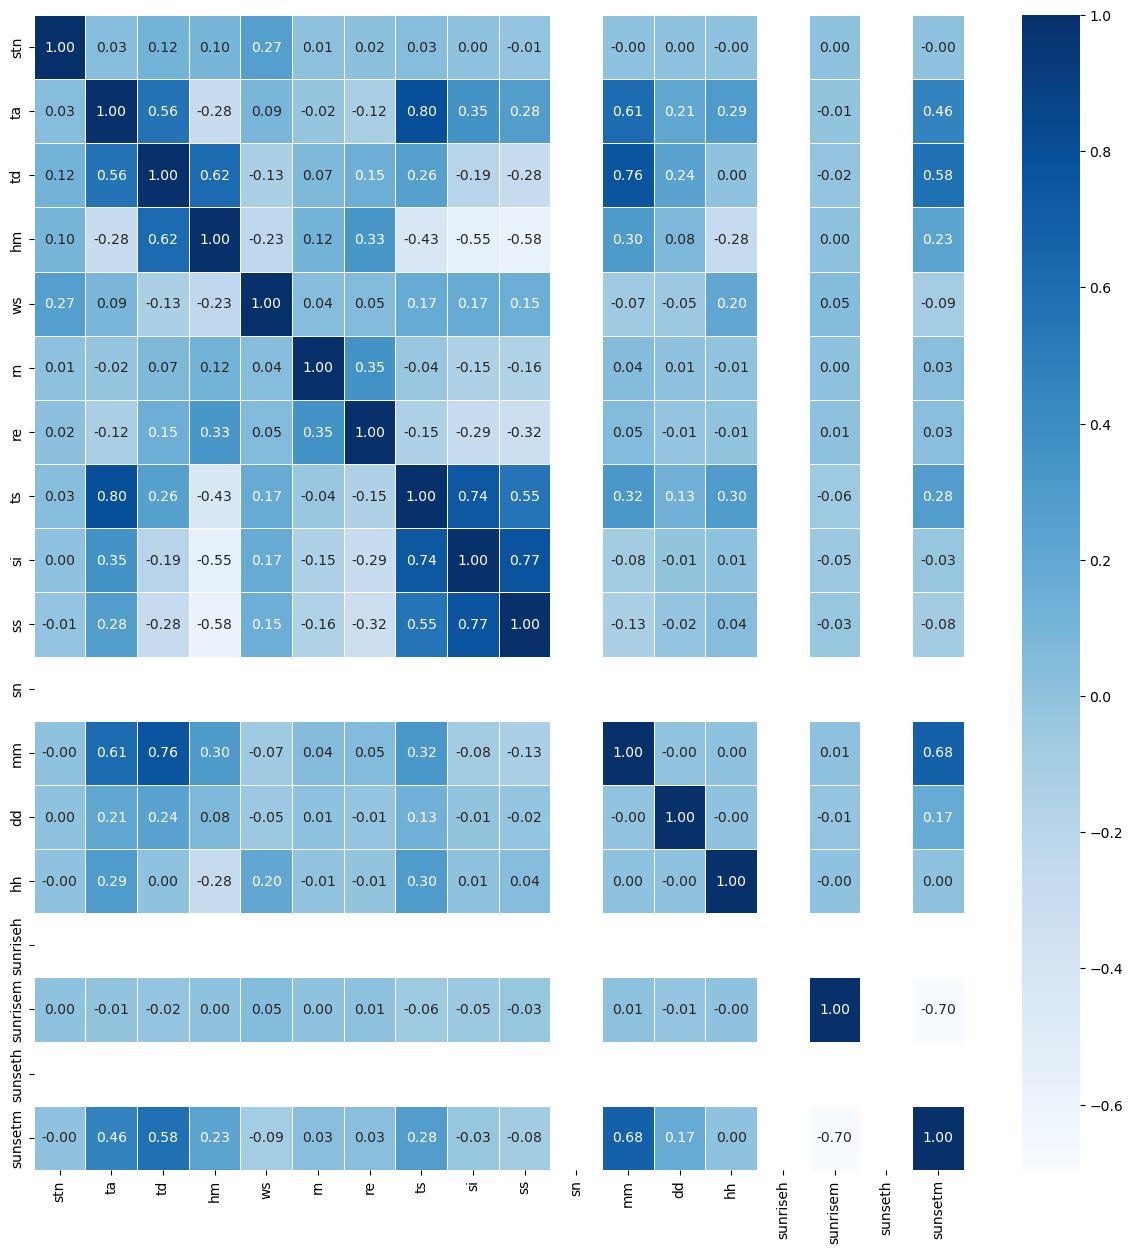

In [5]:
# 변수의 전체적인 상관관계
plt.figure(figsize=(15,15))
sns.heatmap(data = summer.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [6]:
# 간략한 그래프
summer.describe()

,stn,ta,td,hm,ws,rn,re,ts,si,ss,sn,mm,dd,hh,sunriseh,sunrisem,sunseth,sunsetm
count,110233.000000,110217.00000,110211.000000,110225.000000,110157.000000,108489.000000,109580.000000,110233.000000,68381.000000,68729.000000,0.0,110233.000000,110233.000000,110233.000000,110233.0,110233.00000,110233.0,110233.000000
mean,5.499605,22.17748,16.115288,71.808610,2.145085,0.237361,3.928545,25.666181,1.262272,0.478808,NaN,5.999447,15.832537,11.499751,5.0,19.51969,19.0,46.735742
std,2.872973,5.02932,6.048281,20.134769,1.440005,2.456504,12.862635,9.199028,1.100288,0.448790,NaN,0.820890,8.854828,6.923801,0.0,8.05713,0.0,10.179854
min,1.000000,3.60000,-11.100000,8.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.000000,1.000000,0.000000,5.0,10.00000,19.0,22.000000
25%,3.000000,18.80000,12.400000,57.700000,1.100000,0.000000,0.000000,19.500000,0.270000,0.000000,NaN,5.000000,8.000000,5.000000,5.0,12.00000,19.0,41.000000
50%,6.000000,22.20000,16.800000,74.400000,1.900000,0.000000,0.000000,24.000000,0.980000,0.400000,NaN,6.000000,16.000000,11.000000,5.0,17.00000,19.0,50.000000
75%,8.000000,25.70000,20.700000,89.100000,2.900000,0.000000,0.000000,30.200000,2.180000,1.000000,NaN,7.000000,23.000000,18.000000,5.0,26.00000,19.0,56.000000
max,10.000000,37.80000,29.100000,100.000000,16.000000,623.500000,60.000000,64.900000,4.770000,1.000000,NaN,7.000000,31.000000,23.000000,5.0,37.00000,19.0,57.000000


### 지면온도
- 7월 한낮 지면온도도 최대 50도 넘는데 이것보다 훨씬 넘게 측정되는 봄의 날씨가 있다?
- 아무래도 이상치 추적해서 값 변경해야 할듯
- https://www.hkbs.co.kr/news/articleView.html?idxno=642190
- 반대로 한여름에 상온이 27도인데 -5.5? 절대 말이 안됨. 이거 기온에 맞춰서 보정 해줘야할 것 같음

In [7]:
# 지면온도가 60도씨 이상인 지역 -> 이게 말이되나?
summer[summer['ts'] < 10]

,stn,year,ta,td,hm,ws,rn,re,ww,ts,si,ss,sn,mm,dd,hh,sunriseh,sunrisem,sunseth,sunsetm
2254,1,B,8.8,6.3,84.3,4.1,0.4,12.0,R,9.9,NaN,NaN,NaN,5,2,23,5,36,19,23
2255,1,B,8.5,4.7,76.7,4.2,0.0,0.0,C,9.3,NaN,NaN,NaN,5,3,0,5,35,19,24
2256,1,B,7.7,3.5,74.7,3.8,0.0,0.0,C,7.7,NaN,NaN,NaN,5,3,1,5,35,19,24
2257,1,B,7.2,3.0,74.6,2.5,0.0,0.0,C,7.4,NaN,NaN,NaN,5,3,2,5,35,19,24
2258,1,B,6.9,3.6,79.4,0.9,0.0,0.0,C,8.2,NaN,NaN,NaN,5,3,3,5,35,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108197,10,E,12.7,2.8,50.9,3.7,0.0,0.0,G,9.9,NaN,NaN,NaN,5,8,3,5,30,19,28
108198,10,E,12.0,2.2,50.8,2.9,0.0,0.0,G,9.2,NaN,NaN,NaN,5,8,4,5,30,19,28
108199,10,E,11.8,1.5,49.3,3.1,0.0,0.0,G,8.8,NaN,NaN,NaN,5,8,5,5,30,19,28
108200,10,E,11.7,0.5,46.1,2.9,0.0,0.0,G,8.6,0.00,0.0,NaN,5,8,6,5,30,19,28


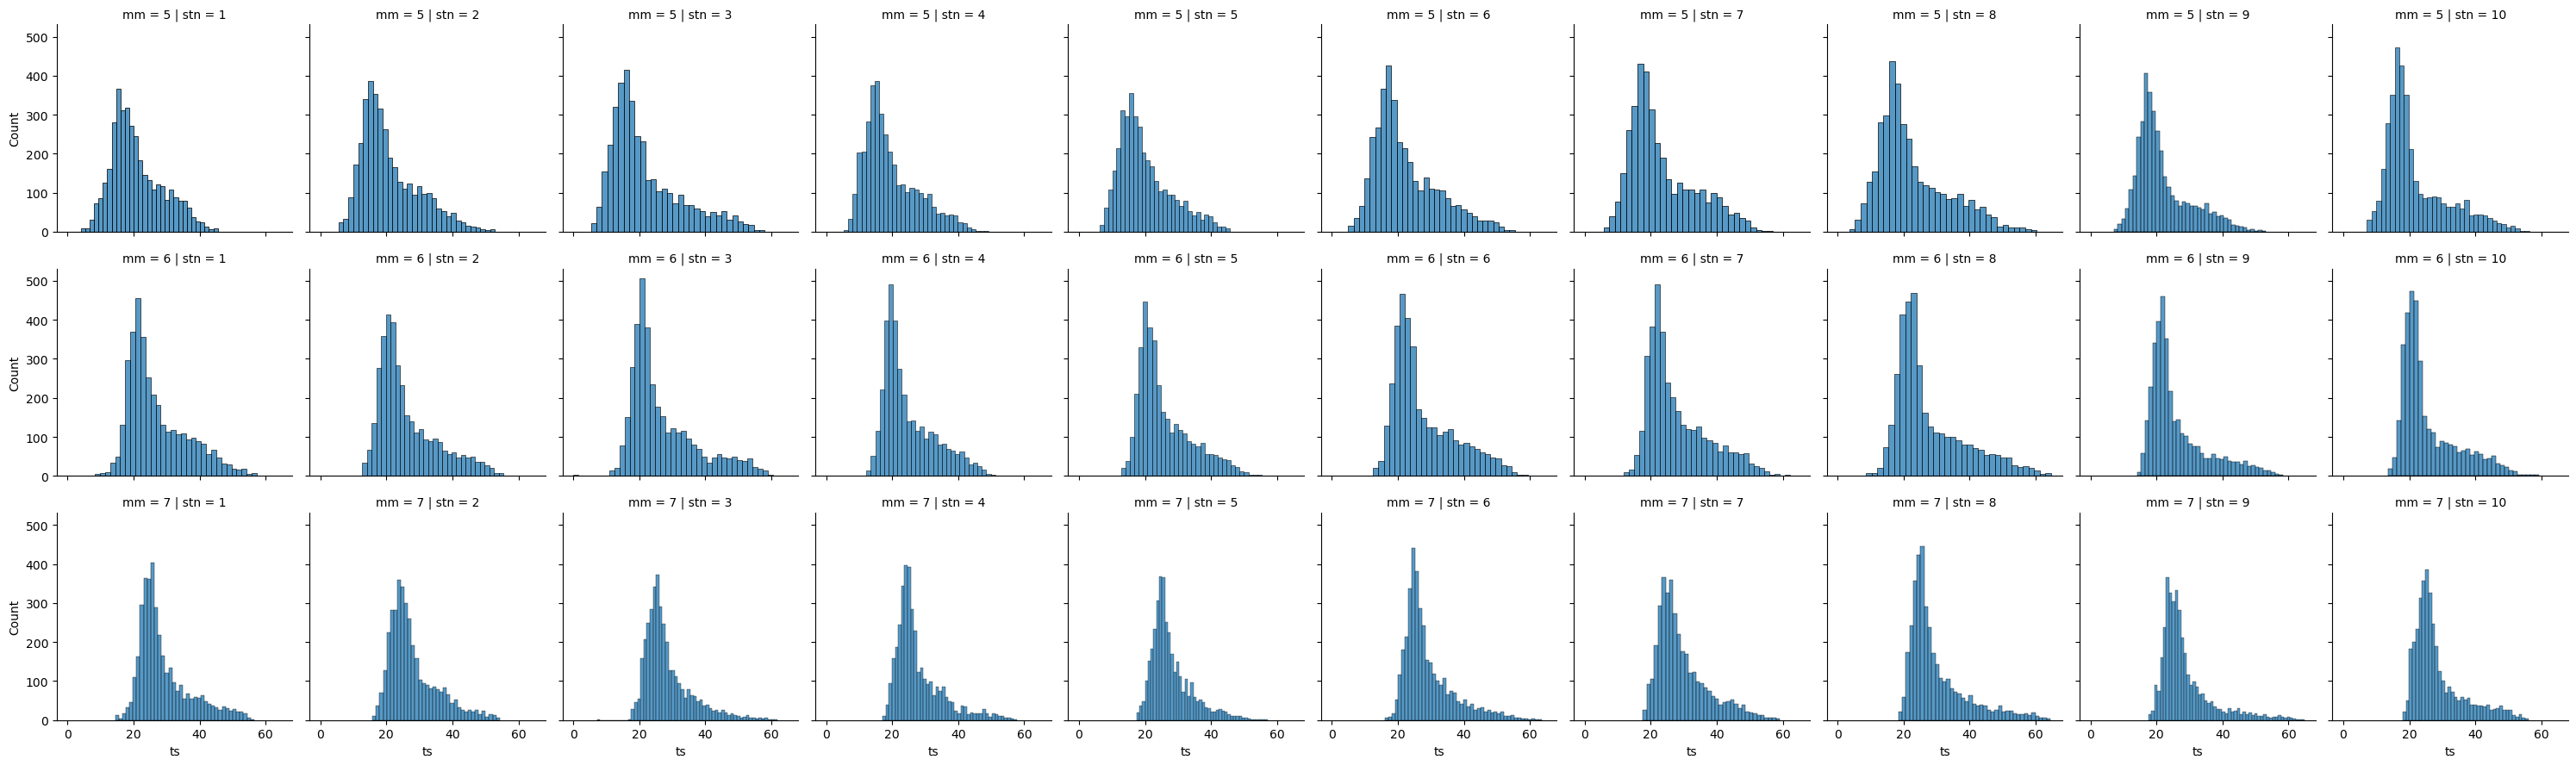

In [8]:
# 지역별 그래프
sns.FacetGrid(data = summer, col = "stn", row = 'mm').map(sns.histplot,"ts")

- 기온에 따른 지면온도를 보정해야 할 것으로 보임
- 일조량은 시간 단위로 되어있고 강수 유무는 분 단위로 되어있기 때문에 시간 단위를 맞춰야 될 것으로 보임
- 그래프를 대충 그려보니 월별 지면온도 차이가 확연히 들어나보이고, 지역 차이는 간혹가다 존재하는 것으로 보임.